In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [2]:

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')



In [3]:

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for feat in binary_features:
    df[feat] = df[feat].astype('int')


In [4]:

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']


In [5]:

numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.750

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [9]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)


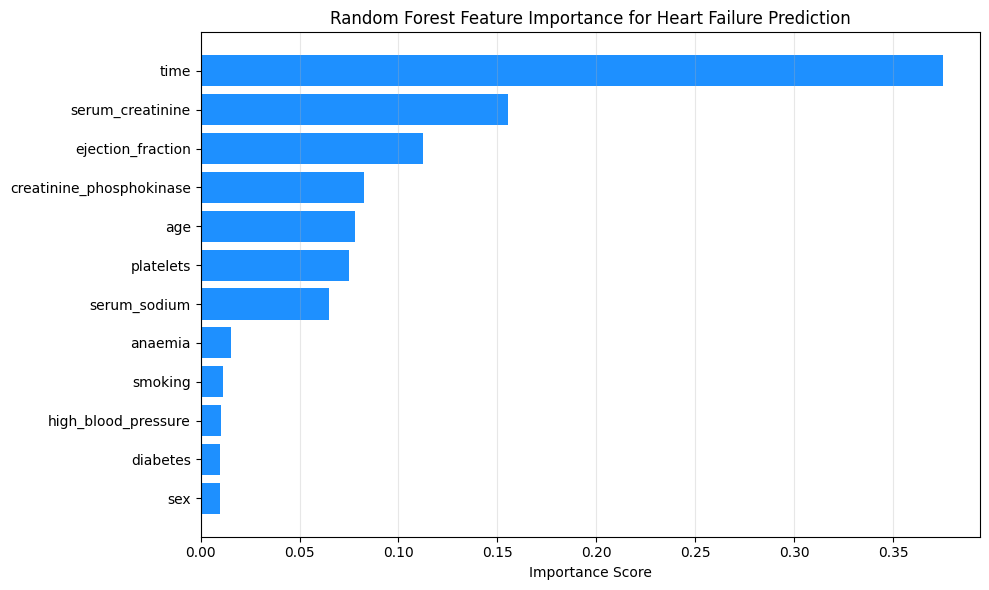

In [10]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='dodgerblue')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance for Heart Failure Prediction')
plt.gca().invert_yaxis()  # Most important at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:

top_feature = feature_importance.iloc[0]
print(f"\nMost Important Feature: '{top_feature['Feature']}' (importance={top_feature['Importance']:.3f})")
print("Medical Interpretation:")
print("- serum_creatinine: Higher levels indicate worse kidney function, a known risk factor for heart failure")
print("- time: Shorter follow-up period may correlate with more severe cases")
print("- ejection_fraction: Measures heart's pumping efficiency, lower values indicate worse function")


Most Important Feature: 'time' (importance=0.375)
Medical Interpretation:
- serum_creatinine: Higher levels indicate worse kidney function, a known risk factor for heart failure
- time: Shorter follow-up period may correlate with more severe cases
- ejection_fraction: Measures heart's pumping efficiency, lower values indicate worse function
